# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [4]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


In [5]:
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
RM         489 non-null float64
LSTAT      489 non-null float64
PTRATIO    489 non-null float64
MEDV       489 non-null float64
dtypes: float64(4)
memory usage: 15.4 KB


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [7]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price)) 
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

**Answer: **

'RM' maybe increases the housing price. Because more rooms have more space and house space related to cost. the small rooms will bring down the property’s value.

'LSTAT' maybe decreases housing price. when calculating the value of a  property, surrounding condition like neighborhood odor could in some cases bring down the value of adjacent homes. sometimes the lower class have the financial problem and the bad condition tends to make people to the bad person.

'PTRATIO' increase house value. most the homebuyers believe the quality of the schools is very important. the more teacher have less student and it means that the more attention student receive. So, High PTRATIO would mean more students per teacher which should reduce the prices of house in that neighborhood.

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [8]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [9]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**Answer :**


0.923 is near 1. but this data is limited. it has only five points. I would consider the target variable cannot be predicted from features. If we have more data points then it will be a more precise estimate of the model's R2 score.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [9]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)
# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

**Answer: **

Overfitting and underfitting is the very important problem in ML and these are the cause of poor performance.  overfitting is very specific to the training data. it happens when a model learns the detail and do not apply to unseen data. also negatively impact the model's ability to generalize.

Underfitting happens when it is too simple. underfitting can neither model the training data nor generalize to new data.

Both overfitting and underfitting can lead to poor performance but the most common problem is overfitting. 

How to overcome overfitting? 

we can split up dataset into the training set and testing set. it will be training dataset is 80% and testing dataset is 20% or training is 70% and testing is 30%. this method is a general way.  we train the model on the training dataset and test to estimate this model by testing dataset. if we train the model on the whole available dataset, would we be able to check its performance on unseen dataset?  Eventually, it will cause overfitting.

So, we split up dataset again into training dataset, validation dataset, and testing dataset.  Use validation data to test model accuracy. this method is Hold-out cross-validation. Hold-out CV method advantage is that it is usually preferable to the residual method and avoid overfitting. but if we have very limited data, this division would be fatal to predict the power of a model.

Another method is k-fold cross-validation. the dataset is divided into k subsets and hold-out method is repeated k times. the advantage of this method  is that it matters less how the data get divide. therefore all subsets in the dataset are eventually used for both training and testing. Also, the true error is estimated as the average error rate.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

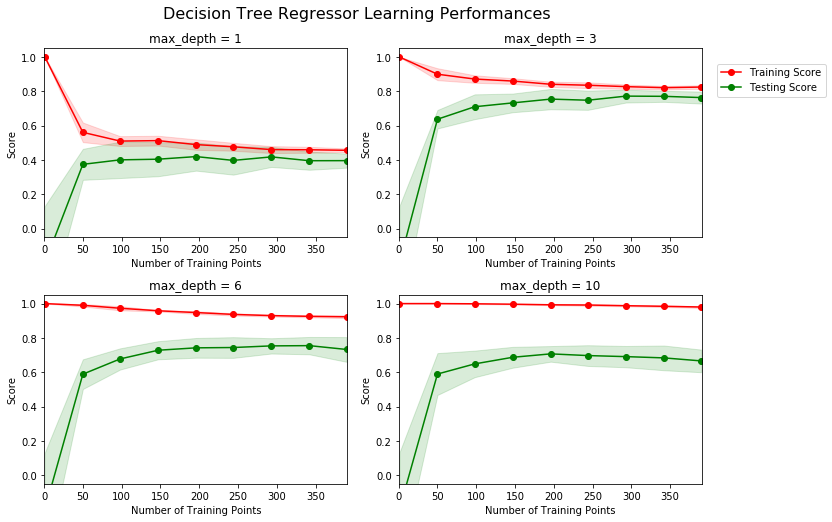

In [15]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Answer: **

I flipped all graph above. as result, the y - axis is cure's measure error and the x-axis is Num training points as ever. so I can have insight about Learning Curve.

(1) max-depth =1 

: this model's hyperparameter is one. 

* Training score - training score line (Red one) increase with the number of observation until approximately 0.4 as measurement error and this line did not increase anymore till 0.5.
So, I can say this model's training score has high training error and this dataset does not fit well. 


* Testing score - testing score line (Green one) decrease from 1 to approximately 0.6 dramatically  (as Error rate ) then reached a plateau with the number of observation. it has a high testing error. this line indicates that the model does not generalize well to unseen data.



* This model is facing high bias, underfitting, and not complexity model. If we add more training points there is no benefit to the model. Instead, find more feature or more complexity should improve model's fitting.

(2) max-depth =3

: this model's hyperparameter is three and it is just right.

* Training score - Training line increase and it plateaus at approximately 0.1 ~ 02 error point. it is the very low rate. so, this model fits well to the dataset and has low training error.



* Testing score - Testing score line decrease till about 0.3 points and stays constant. It has the low testing error and generalizes well.


* this model is no high bias and low variance model. I can say this model is the just right. as a result, if we add more training points then improve it, however, adding training point more and more, it would not be useful for model's fitting.

(3) max-depth =6

: this model's hyperparameter is six. 

* Training score - As the error rate, training scores line stays constant at 0.1 points. it has low training error.


* Testing score - Testing score line decreased from 1 of error rate to 0.4 and gradually down to approximately 200 training points. this line is a slightly high testing error. 


* This model has low training error and slightly high testing error. it indicates that the model has overfitting and slightly high variance problem.

(4) max-depth =10

: this model's hyperparameter is ten and it is definitely overfitting model. 

* Training score - this line remain almost 0.1 of error rate.



* Testing score - this line shows that high error rate than depth=6. it is also not generalizing data.



* As a result, we can know that depth=10 model is poor generalization and overfitting model. therefore, it has high variance problem.  It mean the training error keeps decreasing while the testing error stabilizes.

Until now, I've checked above graphs and i can know that if we add more training data, It would not improve the model's fitting. So, Adding more training dataset would be a time-consuming process.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

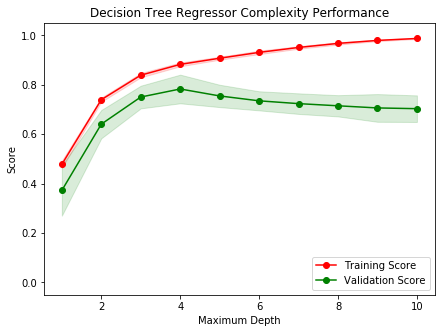

In [16]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

**Answer: **

For good performance and good predictive power of a model, we use lots concept like Regularization, Learning curves, and Complexity curves, etc. Also, we expect to gain low bias and low variance. but it is often a battle to balance out bias and variance. 

* Bias has low predictive performance on a complex model. High bias mean the model is not even fitting on the training data. 

* Variance means that how far data are spread out from their mean. It gives us the information about the generalization power of our model. High variance is not performing well on the testing dataset.



(1) max_depth=1 : It is high bias. training score and testing score, in term of error, record approximately 0.6. it is slightly high error. we know that this model not fitting well and not generalizing well. Moreover, these lines are very close to each other.

(2) max_depth=2 :  At point of maximum depth of 10, Validation error remains almost 0.3 and Training error case stays around 0.1. this gap between two error rate is 0.2 above. it explained that the model is overfitting also it has Low training error and High testing error thus the model is suffering from High variance problem.

Increasing the bias will decrease the variance and increasing the variance will decrease the bias. it is Bias-Variance tradeoff.

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**Answer: **

Our goal is always to have a good testing error. At point of maximum depth of 4, I flipped above graph again,  has low testing error and low training error. After 4 of point, testing error gradually increases with depth. that point generalizes to unseen data well. So, I can say the point of 4 is just right point. 

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

**Answer: **

ML algorithms are driven by parameters. these parameters influence the outcome of learning. Parameter tuning is to find the optimal value and improve the accuracy of the model and we called it to 'Hyper-parameter'.

And The grid search is one of tuning method to optimisze parameter. it literally tests and train dataset all by cross-validation, and to pick the best combination. After the search, the combination of parameters generates the best prediction.

namely, grid search's goal is run the different combinations of parameters through cross-validation and choose the best combination base on  CV score. cross-validation is used because just making a choice based on training will not be very reliable. 
Also, grid search will only use cross-validation score to make its choice and As you know, cross-validation has a test dataset. it definitely related to the training data set.

However, grid search has serious defects. Problem is that it is quite time consuming. because this method tries every combination and also can be computationally expensive. Alternatively, Instead of testing everything, we can try exploring the space of possible hyperparameters. Searching randomly is good approach technique.

### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

**Answer: **

K-fold CV is a common type of cross-validation and an algorithm validation technique. Partition the original training dataset into k equal subsets. Each subset is called fold. Single subset is retained as the validation data for testing the model, and the remaining k-1 subsets are used as training dataset. k-fold CV is then repeat k times with each of the k subsets. these subsets will used exactly once as the validation data. 

Therefore, k-fold CV average k results from the folds and yield a single estimation value. advantages of k-fold CV is all observations are used for both training data and validation datasets and this estimation is nearly accuracy.

So, The main purpose of k-fold cross-validation is to get an unbiased estimate of model generalization on unseen data. If we are satisfied that a particular algorithm is good for a particular data set, we test it on the dataset we had kept aside at the beginning.

Let us assume we have 100 rows in total. out of these 100 rows, 20 rows are taken out for final testing of the model and 80 rows ate kept for training. Now, these 80 rows are divided into k-folds. if we assume k to be 10, then each fold consists of 8 rows. Now out these folds, one fold having 8 rows is kept as validation and rest 72 rows are used as training. this process will repeat with each fold being one validation set. Once we are sure about our model. the final model performance is check on the 20 rows we had taken out in the beginning. 

Grid search goal is to find a good combination of parameters but using grid search without cross-validation, it will be no good results on the test set. because the result could be changed based on how we split it. so, If we do not use a cross-validation then it will cause high variance with the estimate out-of-sample performance.



### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [24]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0],n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = dict(max_depth=[1,2,3,4,5,6,7,8,9,10])
    
    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, params, cv=cv_sets, scoring=scoring_fnc)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [25]:
print (fit_model(X_train, y_train))

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')


In [26]:
X_sample = X_train
y_sample = y_train

In [27]:
#Create GridsearchCV object for best_score
cv_sets = ShuffleSplit(X_train.shape[0],n_iter = 10, test_size = 0.20, random_state = 0)

regressor = DecisionTreeRegressor(random_state=0)

params = dict(max_depth=[1,2,3,4,5,6,7,8,9,10])

scoring_fnc = make_scorer(performance_metric)

testing_obj = GridSearchCV(regressor, params, cv=cv_sets, scoring=scoring_fnc)

In [28]:
after_testing_obj=testing_obj.fit(X_sample, y_sample)

In [29]:
#Best score parameter
after_testing_obj.best_score_

0.7841948495195448

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [30]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


** Hint: ** The answer comes from the output of the code snipped above.

**Answer: **

GridsearchCV object search over the whole dictionary of different parameter values in each k-fold split and it will use the estimator (this case is Decisionregressor) object to fit the data and test, predict on the left out k-fold test data.
And it will average the score for each parameter over all k-folds and pick the best parameter based on the scoring function.

As a result above, this model's GridsearchCV returns that best_score is 0.784 for max_depth of 4. also, I mentioned from Queistion 6.  max_depth=4 is the just right point. after that point, Testing error gradually increase with max_depth. So, the optimal model is same as my geuss.


### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [31]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $406,933.33
Predicted selling price for Client 2's home: $232,200.00
Predicted selling price for Client 3's home: $938,053.85


In [35]:
# Statistics summary of LSTAT
data.LSTAT.describe()

count    489.000000
mean      12.939632
std        7.081990
min        1.980000
25%        7.370000
50%       11.690000
75%       17.120000
max       37.970000
Name: LSTAT, dtype: float64

In [36]:
# Statistics summary of PTRATIO
data.PTRATIO.describe()

count    489.000000
mean      18.516564
std        2.111268
min       12.600000
25%       17.400000
50%       19.100000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64

**Answer: **

Comparing Client prices and whole dataset by Data Exploration section

Minimum price: $105,000.00

Maximum price: $1,024,800.00

Mean price: $454,342.94

Median price $438,900.00

Standard deviation of prices: $165,340.28

As I mentioned before, surrounding condition and quality of the school is very important to judging the price of a house. In client_data, client 1 and 2 have poor conditions. LSTAT's mean is 13% but client 1's LSTAT is 17%. it is slightly high and client 2's LSTAT is 32%. this ratio is high than client 1 and client 3. besides, PTRATIO of client 2 is 31%. this rate is bigger than whole data's PTRATIO mean of 18%. besides, both client has fewer rooms than client 3.  These conditions no good for selling the house.

Constantly, client 3 has the good condition like low neighborhood financial, low Student-teacher ratio of school and the number of rooms than both clien1 and client 2.

Resultingly, selling price for client 1 and client 2's home are below than mean price of the data-exploration section. client 3 cases, it is above the mean and median prices. also, very close to the maximum house price.  so, that results are reasonableness.

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [34]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer: **

* Data that was collected from 1978 is not helpful today. Boston's local population and the economy has changed a lot since then. therefore, this model training on data from a rural city is not fit to be used in urban city like Newyork, California since the demand for housing in the Big city is much greater than Boston. So, that data would fail to predict the price of Boston's current house.


* The feature data is not sufficient to describe a home. That feature includes tree thing only. but In the real-world, there are lots of factors that drive the Real estate market. main factors that affect the house price are proximity to local employment opportunities, proximity to Scocial, Shopping and recreational center, mortgage financing and crime rate etc. 
If we add these factors, it will be better able to fit the dataset for prediction.


* I think this model is not fair to judge the price of an individual home. mostly because that data seems to be insufficient and outdated, also, noise pollution, zoning laws, and traffic value are the main issue. So, In order to be used in  a real-world  it should be improved.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.